In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset 
load diabetes_data

In [2]:
df = pd.read_csv('diabetes_data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
# X = df[df.columns.difference(['Outcome'])]
X = df[['Glucose', 'BMI']]
y = df.Outcome

## Divide the dataset into train and test datasets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Implement the following functions to create your own logistic regression algorithm from scratch.
#### Feel free to use more additinal functions in your implementation.

In [8]:
def sigmoid(X):
    
    """
    :param X: data matrix (2 dimensional np.array)
    
    """
    return 1 / (1 + np.exp(-X))

In [9]:
def logistic_func(beta, X):
    """
    :param X: data matrix (2 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    
    """
    return sigmoid(X.dot(beta))

In [10]:
def gradient(beta, X, Y):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: np.array i.e. gradient according to the data
    
    """
    return (logistic_func(beta, X) - Y).T.dot(X)

In [11]:
def cost_func(X, Y, beta):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: numberic value of the cost function
    
    """
    return (-Y.dot(np.log(logistic_func(beta, X))) - (1-Y).dot(np.log(1 - logistic_func(beta, X)))).mean()

In [12]:
def gradient_descent(X, Y, epsilon=1e-6, step_size=1e-4, max_steps=1000):
    """
    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param epsilon: threshold for a change in cost function value
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    
    """
    
    beta = np.zeros(X.shape[1])
    print(beta)
    for i in range(max_steps):
        beta = beta - step_size * gradient(beta, X, Y)
        cost = cost_func(X, Y, beta)
        if cost <= epsilon:
            break
    return beta.values 

## Run logistic regression using the features of your choice and using "Outcome" as a target variable

In [13]:
beta = gradient_descent(X_train, y_train)     

[0. 0.]


/home/gayane/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gayane/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
beta

array([-2.24209132, -4.53100164])

## Use the logistic regression available in Sklearn on the same data.

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/home/gayane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
logreg.coef_, logreg.intercept_

(array([[0.02704399, 0.04590704]]), array([-5.4144591]))

## Extra: try to plot the results of your algorithm i.e. a scatter plot of points classified into 2 classes in different colors.

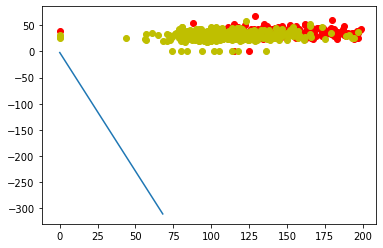

In [21]:
plt.scatter(X_train[y_train == 1].Glucose, X_train[y_train == 1].BMI, c='r')
plt.scatter(X_train[y_train == 0].Glucose, X_train[y_train == 0].BMI, c='y')
x_range = np.arange(X_train.BMI.min(), X_train.BMI.max()+1)
plt.plot(x_range, beta[0] + beta[1] * x_range)